<a href="https://colab.research.google.com/github/John260260/Classification_problms_ML/blob/main/Air_passengers_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=10,6

In [2]:
indexedDataset = pd.read_csv('/content/drive/MyDrive/datasets/AirPassengers.csv',header=0, parse_dates=[0], names=['Month', 'Passengers'], index_col=0)

In [3]:
indexedDataset.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


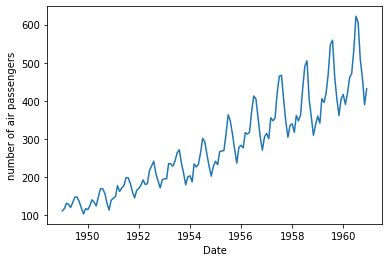

In [4]:
plt.xlabel('Date')
plt.ylabel('number of air passengers')
plt.plot(indexedDataset)

In [5]:
#determining rolling statistics
rolmean= indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print (rolmean,rolstd)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


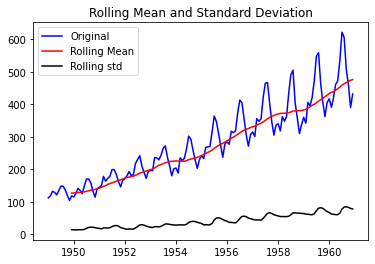

In [6]:
#plotting rolling statistics (to see whether our  data is stationary or not)

orig=plt.plot(indexedDataset, color='blue', label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [7]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(indexedDataset['Passengers'],autolag='AIC')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
dftest

(0.8153688792060472,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.6929308390189)

In [9]:
#perform dickey fuller test:(ADCF Test)

from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test: ')
dftest=adfuller(indexedDataset['Passengers'],autolag='AIC')
#The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data.

dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Cirtical Value(%s)'%key]=value

print (dfoutput)
#large p value hence we cant reject null hypothesis and data is not stationary

Results of Dickey-Fuller Test: 
Test Statistic                   0.815369
p-value                          0.991880
Lags Used                       13.000000
Number of Observations Used    130.000000
Cirtical Value(1%)              -3.481682
Cirtical Value(5%)              -2.884042
Cirtical Value(10%)             -2.578770
dtype: float64


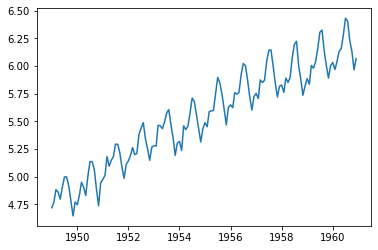

In [10]:
#estimating trend
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

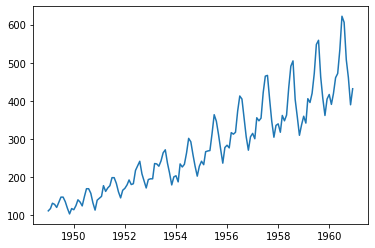

In [11]:
plt.plot(indexedDataset)

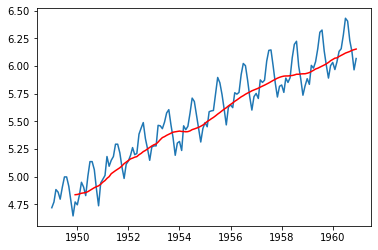

In [12]:
#Moving avg with log scale
movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingSTD= indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')
#plt.plot(movingSTD,color='yellow')

In [13]:
#again since our MA is not stationary we are trying to minus the MA and Log scale so that we can get stationarity in data
datasetLogScaleMinusMovingAverage= indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove Null values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [14]:
def test_stationarity(timeseries):

  #Determing rolling statistics
  movingAverage=timeseries.rolling(window=12).mean()
  movingSTD=timeseries.rolling(window=12).std()

  #plot rolling statistics:
  orig=plt.plot(timeseries, color='blue', label='Original')
  mean=plt.plot(movingAverage, color='red', label='RollingMean')
  std=plt.plot(movingSTD, color='black', label='RollingSTD')
  plt.legend(loc='best')
  plt.title('Rolling Mean & STD')
  plt.show(block=False)

  #Perform Dickeyfuller test
  print('Results of Dickey-Fuller Test: ')
  dftest=adfuller(timeseries['Passengers'],autolag='AIC')
  #The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data.

  dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags Used', 'Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Cirtical Value(%s)'%key]=value

  print (dfoutput)
  #large p value hence we cant reject null hypothesis and data is not stationaryc'])


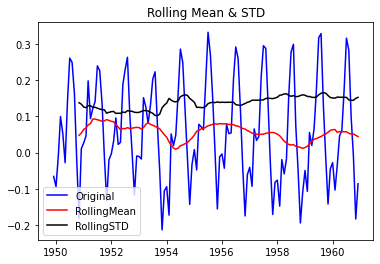

Results of Dickey-Fuller Test: 
Test Statistic                  -3.162908
p-value                          0.022235
Lags Used                       13.000000
Number of Observations Used    119.000000
Cirtical Value(1%)              -3.486535
Cirtical Value(5%)              -2.886151
Cirtical Value(10%)             -2.579896
dtype: float64


In [15]:
test_stationarity(datasetLogScaleMinusMovingAverage)

p value is less than 0.05 so the null hypothesis is rejected that data isnt stationary
Test statistics and Critical value is also moreover same which suggests that the data is stationary

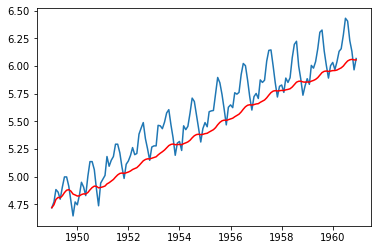

In [16]:
#calculating weighted avg of time series so that abel to see the trend in time series

exponentialDecayWeightedAverage= indexedDataset_logScale.ewm(halflife=12, min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

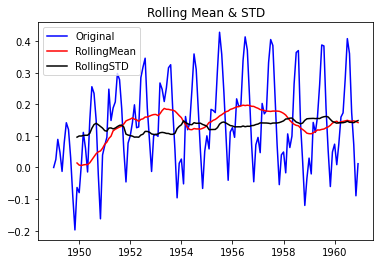

Results of Dickey-Fuller Test: 
Test Statistic                  -3.601262
p-value                          0.005737
Lags Used                       13.000000
Number of Observations Used    130.000000
Cirtical Value(1%)              -3.481682
Cirtical Value(5%)              -2.884042
Cirtical Value(10%)             -2.578770
dtype: float64


In [17]:
# earlier we substracted moving average from log scale now we will substract the weighted average from the log scaled data

datasetLogScaleMinusMovingExponentialDecayAverage= indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

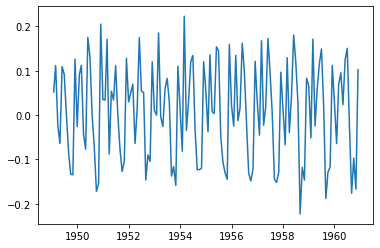

In [18]:
#we are shifting the data and minusing from the yesterday days 
#(this is the differentiation of the order (here 1 since shifted once)i.e the dth element in ARIMA model)

datasetLogDiffShifting= indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

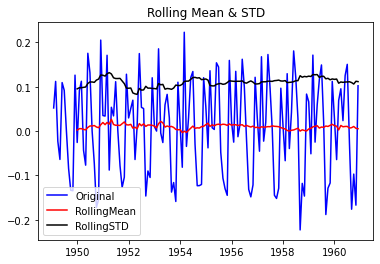

Results of Dickey-Fuller Test: 
Test Statistic                  -2.717131
p-value                          0.071121
Lags Used                       14.000000
Number of Observations Used    128.000000
Cirtical Value(1%)              -3.482501
Cirtical Value(5%)              -2.884398
Cirtical Value(10%)             -2.578960
dtype: float64


In [20]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

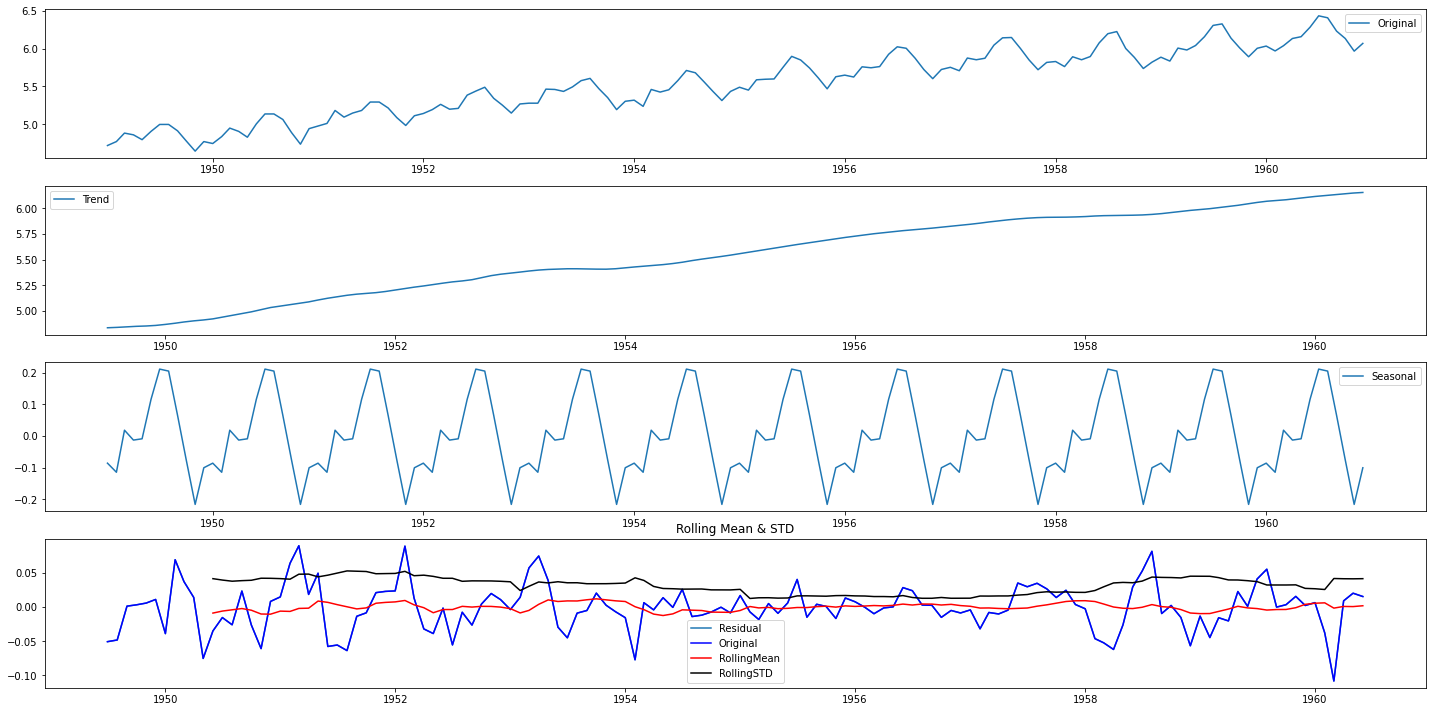

Results of Dickey-Fuller Test: 
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
Lags Used                      9.000000e+00
Number of Observations Used    1.220000e+02
Cirtical Value(1%)            -3.485122e+00
Cirtical Value(5%)            -2.885538e+00
Cirtical Value(10%)           -2.579569e+00
dtype: float64


In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition= seasonal_decompose(indexedDataset_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData= residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

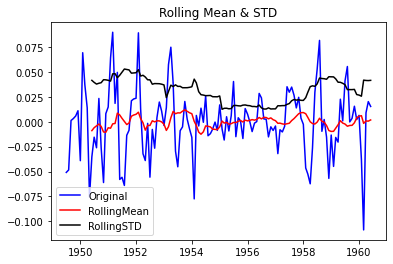

Results of Dickey-Fuller Test: 
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
Lags Used                      9.000000e+00
Number of Observations Used    1.220000e+02
Cirtical Value(1%)            -3.485122e+00
Cirtical Value(5%)            -2.885538e+00
Cirtical Value(10%)           -2.579569e+00
dtype: float64


In [26]:
# we will check the noise if whether its stationary or not
decomposedLogData= residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


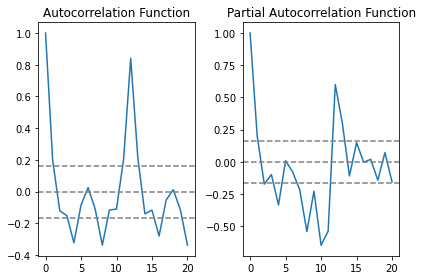

In [29]:
## now we have to find the value of p(pacf graph/AR) and q(acf graph/MA) of ARIMA model

from statsmodels.tsa.stattools import acf,pacf

lag_acf= acf(datasetLogDiffShifting, nlags=20)
lag_pacf= pacf(datasetLogDiffShifting, nlags=20, method='ols')

#plt ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plt PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

* the value of p and q is the value in x axis when the graph 1st touches 0 in y axis i.e 2 for both acf and pacf
* A fitted value is a statistical model’s prediction of the mean response value when you input the values of the predictors, factor levels, or components into the model. Suppose you have the following regression equation: y = 3X + 5. If you enter a value of 5 for the predictor, the fitted value is 20. Fitted values are also called predicted values.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


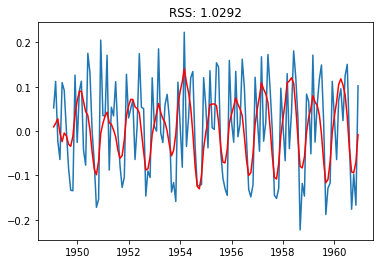

In [44]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

#ARIMA model
model= ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f' %sum ((results_AR.fittedvalues - datasetLogDiffShifting['Passengers'])**2))
print('Plotting ARIMA model')

Plotting MA model


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


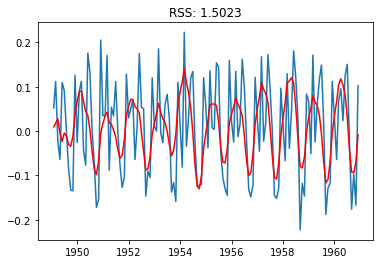

In [32]:
#MA model
model= ARIMA(indexedDataset_logScale, order=(2,1,0))
results_MA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f' %sum ((results_MA.fittedvalues - datasetLogDiffShifting['Passengers'])**2))
print('Plotting MA model')

Plotting AR model


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


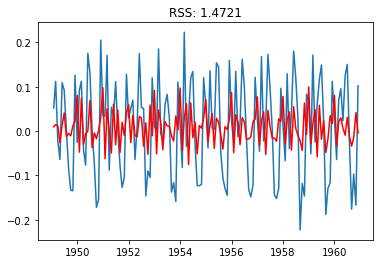

In [33]:
#AR model
model= ARIMA(indexedDataset_logScale, order=(0,1,2))
results_MA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f' %sum ((results_AR.fittedvalues - datasetLogDiffShifting['Passengers'])**2))
print('Plotting AR model')

* We saw MA alone gves RSS of 1.5 whereas AR gives RSS of 1.4 
* combination of AR&MA ie ARIMA gives a RSS of 1.02

In [45]:
#PREDIDCTIONS ACCORDING TO OUR MODEL
predictions_ARIMA_diff= pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
                ...   
1960-08-01   -0.041176
1960-09-01   -0.092350
1960-10-01   -0.094013
1960-11-01   -0.069924
1960-12-01   -0.008127
Length: 143, dtype: float64


In [46]:
# we are going to do cumulative sum so that we can do the predictions 
#Cumulative Sum= Calculate the other cumulative sums by adding the difference between current value and the average to the previous sum

predictions_ARIMA_diff_cumsum= predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [57]:
indexedDataset_logScale['Passengers']

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Passengers, Length: 144, dtype: float64

In [52]:
predictions_ARIMA_log=pd.Series(indexedDataset_logScale['Passengers'].iloc[0], index= indexedDataset_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773240
1949-05-01    4.768720
dtype: float64

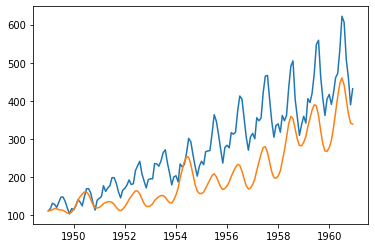

In [53]:
predictions_ARIMA= np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

* Cumulative sum
* predictions a
* exponent

In [54]:
indexedDataset_logScale.shape

(144, 1)

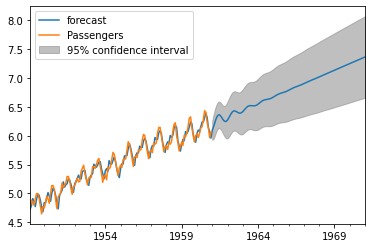

In [56]:
#we want to predict for 10 yrs so datapoints will be 12*10=120

results_ARIMA.plot_predict(1,264) #120+144=264

In [58]:
x=results_ARIMA.forecast(steps=120)
x

(array([6.09553389, 6.15281393, 6.22442948, 6.29241076, 6.34164688,
        6.36359335, 6.35784666, 6.33139295, 6.29597541, 6.26447722,
        6.24738335, 6.25025176, 6.27275831, 6.30940294, 6.35151464,
        6.38988618, 6.41727342, 6.4301102 , 6.42906664, 6.41842474,
        6.4045615 , 6.39403616, 6.39183083, 6.40019498, 6.41833678,
        6.44295382, 6.46937401, 6.49293946, 6.51024079, 6.51988998,
        6.5226755 , 6.52112367, 6.51864513, 6.51853679, 6.52311911,
        6.53322344, 6.54812846, 6.56591526, 6.58410271, 6.60036499,
        6.61313226, 6.62192744, 6.62737757, 6.63093102, 6.63438666,
        6.63937964, 6.64696482, 6.65739815, 6.67015294, 6.68414215,
        6.69806586, 6.71077859, 6.7215769 , 6.73033944, 6.73749774,
        6.74386345, 6.75037292, 6.75782562, 6.7666865 , 6.77699789,
        6.78841281, 6.80032812, 6.81207151, 6.82308715, 6.83307091,
        6.84202449, 6.85022271, 6.85811181, 6.86617301, 6.87479112,
        6.88416263, 6.89426342, 6.90487845, 6.91